In [97]:
using Plots
include("DGP.ji")
include("model.ji")

main (generic function with 3 methods)

In [98]:
α = [-1, 2] # single index for x
θ = [2, 1]  # linear for x, <α, θ> = 0 for identification
# γ = [0, 0]
# β = [0, -0]
γ = [1, 1] # single index for z
β = [1, -0.5] # linear for z

# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
p = length(α)
q = length(γ)

2

In [95]:
h(x) =2 * n^(-2/(x + 4))

h (generic function with 1 method)

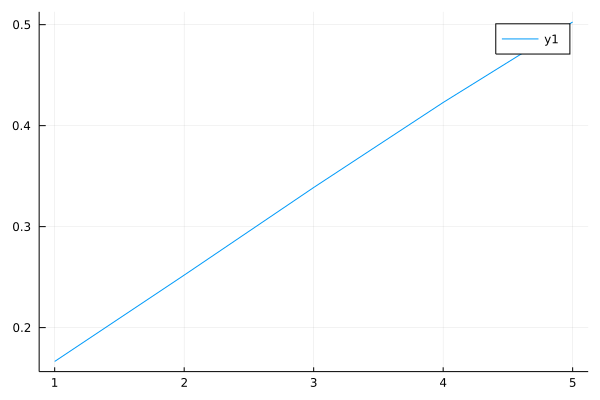

In [96]:
plot(1:5, h.(1:5))

In [100]:
@time alpha, theta = main(γ, θ, α, β, n)

 14.928806 seconds (83.31 M allocations: 9.121 GiB, 25.15% gc time)


([-0.38492612874459187, 0.8237156382891702], [1.9742589985612775 1.0551415635230477])

In [101]:
X, Z, y = dgp(n, γ, θ, α, β, true)
@time alpha, theta = main(X, Z, y)

 15.968135 seconds (91.32 M allocations: 10.020 GiB, 25.62% gc time)


([-0.485070031842671, 0.8217378503804866], [1.9873070228285832 1.2336050988088587])

In [102]:
categ, index, = qgplsim.collection(Z)

(Any[[0, 1], [1, 2], [1, 1], [0, 0], [0, 2], [1, 0]], Dict{Any,Any}([0, 1] => [1, 5, 7, 12, 14, 22, 23, 24, 29, 32  …  460, 472, 477, 483, 486, 489, 490, 493, 495, 496],[0, 2] => [10, 25, 26, 28, 50, 54, 75, 91, 97, 98  …  422, 428, 432, 438, 439, 442, 452, 479, 492, 497],[1, 1] => [3, 8, 9, 11, 17, 18, 20, 21, 30, 31  …  464, 465, 467, 471, 474, 475, 482, 484, 487, 498],[0, 0] => [4, 13, 15, 27, 46, 47, 49, 53, 60, 70  …  417, 419, 423, 431, 433, 434, 443, 466, 468, 485],[1, 2] => [2, 6, 19, 42, 77, 93, 94, 110, 123, 134  …  451, 455, 462, 463, 470, 480, 481, 488, 494, 500],[1, 0] => [16, 38, 56, 63, 65, 79, 85, 100, 105, 107  …  421, 427, 430, 449, 469, 473, 476, 478, 491, 499]), [0, 1])

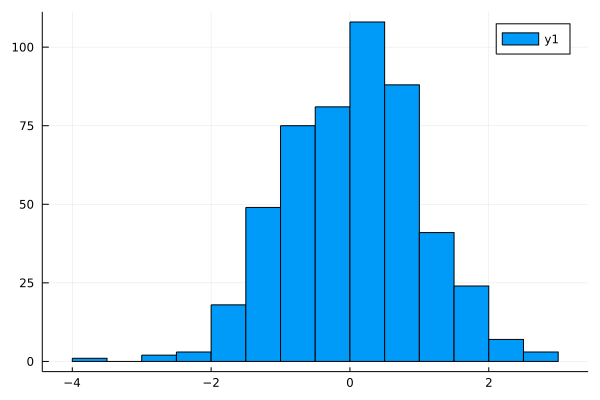

In [103]:
v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
histogram(v)

In [104]:
g, dg = qgplsim.gamma_estimator(v, Z, y) # g: g(v), dg: g'(v)

([0.5643733294257536, 2.4783128487017523, 0.3568265421761241, 3.770737779950022, 0.44433930389506016, 6.483005778745772, -0.17104679771919762, 2.591794367564624, 2.44498172328936, 0.4161030696955568  …  3.9444798462950232, -0.12308903866024844, 1.4734144845154258, 2.1374971465435597, 5.3704705357075735, 0.5400013184711958, 0.14766314797392016, 0.22198272890611936, 1.2739666450499592, 1.8400455787540546], [1.4620431462310777, 0.8523826553956914, 2.2358297653527406, 3.5233719786943074, 1.4693148991565261, 3.89161122008192, -0.5232125528910125, 0.5149948466215437, 0.5451443498813111, 1.127614481747792  …  3.3791453023803975, 1.4549109754551655, 1.88971572704963, 0.28199018852384955, 3.9316443079273187, 1.4741248598624557, -0.8013350174252307, 2.2340281367976313, 0.10869058630301906, -0.5352786963411632])

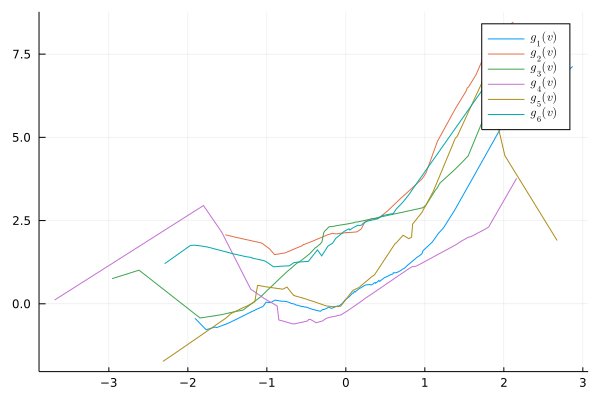

In [172]:
using LaTeXStrings
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

In [185]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    @time indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end

  0.000018 seconds (2 allocations: 1.234 KiB)
  0.000005 seconds (2 allocations: 560 bytes)
  0.000009 seconds (2 allocations: 1.078 KiB)
  0.000005 seconds (2 allocations: 640 bytes)
  0.000005 seconds (2 allocations: 560 bytes)
  0.000005 seconds (2 allocations: 560 bytes)


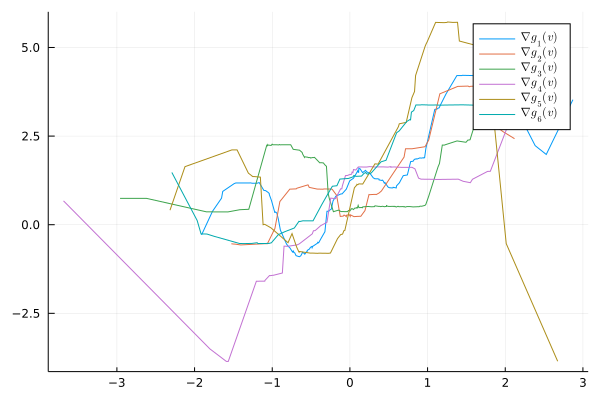

In [186]:
fig

In [108]:
Theta = zeros(100, p)
Alpha = zeros(100, p)
import Base.Threads.@threads

In [109]:
t = time()
len = 50
@threads for i in 1:2
        for j in 1:len
    Alpha[len*(i - 1) + j, :], Theta[len*(i - 1) + j, :] = main(γ, θ, α, β, n)
    end
end
println("MC Computing time: ", time() - t)
println(sum(Alpha, dims = 1))
println(sum(Theta, dims = 1))

MC Computing time: 1104.6854610443115
[5.913489145929477 -9.052962736348034]
[168.9099722273829 125.86326494394594]


In [110]:
ct, dc, mc = qgplsim.collection(sign.(Alpha))

(Any[[1.0, 1.0], [-1.0, 1.0], [1.0, -1.0], [-1.0, -1.0]], Dict{Any,Any}([1.0, 1.0] => [1, 29, 54, 69, 82],[-1.0, -1.0] => [16, 20, 23, 26, 48, 91],[-1.0, 1.0] => [2, 3, 5, 6, 7, 8, 11, 13, 19, 22  …  78, 83, 84, 85, 86, 87, 90, 92, 98, 99],[1.0, -1.0] => [4, 9, 10, 12, 14, 15, 17, 18, 21, 25  …  80, 81, 88, 89, 93, 94, 95, 96, 97, 100]), [1.0, -1.0])

In [111]:
mc

2-element Array{Float64,1}:
  1.0
 -1.0

In [112]:
rAlpha = Alpha[dc[mc], :]
rTheta = Theta[dc[mc], :]
ns, = size(rAlpha)

(50, 2)

In [113]:
sum(rAlpha, dims = 1)/ns

1×2 Array{Float64,2}:
 0.533028  -0.762103

In [114]:
sum(rTheta, dims = 1)/ns

1×2 Array{Float64,2}:
 1.89899  1.41293